In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import pandas as pd
import scipy.io as sio

image_dir = 'data/img'
labels_file = 'data/miml_data.mat'

# Images (Bags)

In [235]:
image_files = ['/'.join((image_dir, filename)) for filename in os.listdir(image_dir)]
label_data = sio.loadmat(labels_file)
labels = np.transpose(test['targets'])

n_bags = len(image_files)

In [42]:
img=mpimg.imread(image_files[0])

In [44]:
img.shape

(41, 128, 3)

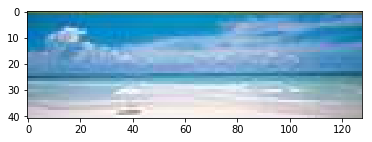

In [124]:
plt.imshow(img)

# Patches (Instances)

In [171]:
def get_patch(img, patch_dim):
    i_start = np.random.randint(img.shape[0] - patch_dim)
    j_start = np.random.randint(img.shape[1] - patch_dim)
    patch = img[i_start:(i_start+patch_dim), j_start:(j_start+patch_dim), :]
    return(patch, i_start, j_start)

def plot_bb(i_start, j_start, patch_dim):
    top = np.array([(j, i_start) for j in range(j_start, j_start+patch_dim)])
    bottom = np.array([(j, i_start+patch_dim-1) for j in range(j_start, j_start+patch_dim)])
    left = np.array([(j_start, i) for i in range(i_start, i_start+patch_dim)])
    right = np.array([(j_start+patch_dim-1, i) for i in range(i_start, i_start+patch_dim)])
    
    plt.plot(left[:,0], left[:,1], color = 'red')
    plt.plot(right[:,0], right[:,1], color = 'red')
    plt.plot(top[:,0], top[:,1], color = 'red')
    plt.plot(bottom[:,0], bottom[:,1], color = 'red')

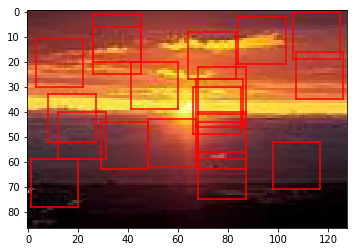

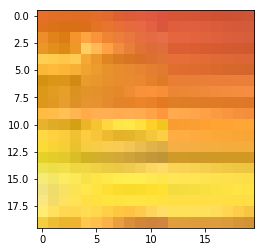

In [287]:
img_idx = np.random.choice(n_bags)
img=mpimg.imread(image_files[img_idx])

n_patches = 20
patch_dim = 20

patches = []
plt.figure()
plt.imshow(img)
for i in range(n_patches):
    patch, i_start, j_start = get_patch(img, patch_dim)

    patches.append(patch.reshape(-1))
    plot_bb(i_start, j_start, patch_dim)
    
    if i == n_patches - 1:
        plt.figure()
        plt.imshow(patch)

patches = np.array(patches)

In [291]:
patches.shape

(20, 1200)

# Making New Dataset

In [300]:
n_patches = 20
patch_dim = 20

data = {
    'images': [],
    'bags': [],
    'labels': labels,
    'n_instance': n_patches,
    'instance_dim': (patch_dim, patch_dim, 3)
}
for file in image_files:
    img=mpimg.imread(file)
    data['images'].append(img)
    
    patches = []
    for i in range(n_patches):
        patch, i_start, j_start = get_patch(img, patch_dim)
        patches.append(patch.reshape(-1))

    patches = np.array(patches)
    data['bags'].append(patches)

In [303]:
sio.savemat('data/preprocessed', data)